# Merging the expenditure and school demographic and accountability data

In this notebook, we merge the school demographic and accountability data with the budget expenditure data.

In [31]:
import pandas as pd

data_2006 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2006.csv', index_col=0)
data_2007 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2007.csv', index_col=0)
data_2008 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2008.csv', index_col=0)
data_2009 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2009.csv', index_col=0)
data_2010 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2010.csv', index_col=0)
data_2011 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2011.csv', index_col=0)
data_2012 = pd.read_csv('../../data/clean_expenditure_data_by_year/clean_year_2012.csv', index_col=0)

In [32]:
all_years_data = {2006: data_2006, 2007: data_2007, 2008: data_2008, 2009: data_2009, 2010: data_2010, 2011: data_2011, 2012: data_2012}

In [33]:
all_years_data[2006].head(3)

,Additions_to_Regular_Salary,Additions_to_Salary__Projected_Expenses,After_School_and_Student_Activities,Ancillary_Support_Services_All_Funds,Assistant_Principals,Attendance__Outreach_Services,Building_Maintenance,Building_Services_All_Funds,Central_Administration_All_Funds,Central_Instructional_Support_All_Funds,...,Secretaries_School_Aides__Other_Support_Staff,Summer_and_Evening_School,Supervisors,Supplies_Materials_Equipment_Telephones,SystemWide_Costs,Teachers,Text_Books,Title_1,Total,Transportation
M015,1,25,180,2078,3,43,466,1971,261,33,...,771,105,9,125,294,7692,111,1,19556,967
M019,1,23,205,1758,266,115,602,1731,261,32,...,454,82,11,204,293,7201,187,1,17515,929
M020,1,22,460,1251,140,129,159,920,260,41,...,270,156,6,117,301,6233,166,1,15173,249


Next we read in the accountability data.

In [34]:
demo_and_account = pd.read_csv('../../data/clean_demo_account.csv', index_col=0)
demo_and_account.head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,ell_percent,sped_percent,asian_per,black_per,hispanic_per,white_per,male_per,female_per,poverty_level,elementary_school,middle_school,high_school
0,M015,P.S. 015 ROBERTO CLEMENTE,2006,89.4,NaN,281,12.8,20.3,3.6,26.3,67.3,1.8,56.2,43.8,83.887657,1,0,0
1,M015,P.S. 015 ROBERTO CLEMENTE,2007,89.4,NaN,243,15.6,22.6,7.4,28.0,63.0,1.6,57.6,42.4,86.580087,1,0,0
2,M015,P.S. 015 ROBERTO CLEMENTE,2008,89.4,NaN,261,19.9,23.0,6.1,29.5,60.2,2.7,54.8,45.2,89.858156,1,0,0


Now we merge these datasets:

In [35]:
for year in all_years_data:
    print all_years_data[year].shape
    all_years_data[year] = pd.merge(all_years_data[year], demo_and_account[demo_and_account['schoolyear']==year], how='inner', left_on='School', right_on='DBN')
    all_years_data[year].set_index('DBN',inplace=True)
all_years_data[2012].head(3)

(1347, 52)
(1366, 52)
(1394, 53)
(1437, 52)
(1472, 53)
(1497, 53)
(1508, 51)


,Additions_to_Salary__Projected_Expenses,After_School_and_Student_Activities,Ancillary_Support_Services_All_Funds,Assistant_Principals,Attendance__Outreach_Services,Building_Maintenance,Building_Services_All_Funds,Central_Administration_All_Funds,Central_Instructional_Support_All_Funds,Classroom_Instruction_All_Funds,...,asian_per,black_per,hispanic_per,white_per,male_per,female_per,poverty_level,elementary_school,middle_school,high_school
DBN,,,,,,,,,,,,,,,,,,,,,
M015,171,194,1653,65,327,361,2506,391,93,15175,...,6.3,33.3,57.7,2.1,51.3,48.7,87.475149,1,0,0
M019,144,182,1968,567,371,471,962,384,82,8578,...,15.5,24.7,48.2,8.5,44.8,55.2,27.302850,1,0,0
M020,108,270,1969,346,75,579,1749,387,89,10051,...,30.4,8.8,57.0,2.6,52.7,47.3,92.909211,1,0,0


Let's check to make sure we haven't introduced any NaN values (note we are ignoring the columns fl_percent and frl_percent since they necessarily have NaN values):

In [38]:
for year in all_years_data:
    print '\nYear = ', str(year)
    print 'Number observations', len(all_years_data[year])
    print 'Missing variable counts:', all_years_data[year].drop(['fl_percent', 'frl_percent'],axis=1).isnull().sum().sum()


Year =  2006
Number observations 1347
Missing variable counts: 0

Year =  2007
Number observations 1366
Missing variable counts: 0

Year =  2008
Number observations 1394
Missing variable counts: 0

Year =  2009
Number observations 1437
Missing variable counts: 0

Year =  2010
Number observations 1472
Missing variable counts: 0

Year =  2011
Number observations 1497
Missing variable counts: 0

Year =  2012
Number observations 1508
Missing variable counts: 0


Now that we've merged the demographic and accountability data, and the expenditure data, we write the merged data to disc.

In [39]:
all_years_data[2006].head(6)

,Additions_to_Regular_Salary,Additions_to_Salary__Projected_Expenses,After_School_and_Student_Activities,Ancillary_Support_Services_All_Funds,Assistant_Principals,Attendance__Outreach_Services,Building_Maintenance,Building_Services_All_Funds,Central_Administration_All_Funds,Central_Instructional_Support_All_Funds,...,asian_per,black_per,hispanic_per,white_per,male_per,female_per,poverty_level,elementary_school,middle_school,high_school
DBN,,,,,,,,,,,,,,,,,,,,,
M015,1,25,180,2078,3,43,466,1971,261,33,...,3.6,26.3,67.3,1.8,56.2,43.8,83.887657,1,0,0
M019,1,23,205,1758,266,115,602,1731,261,32,...,10.0,25.6,51.5,9.7,53.2,46.8,28.898744,1,0,0
M020,1,22,460,1251,140,129,159,920,260,41,...,32.8,5.1,60.2,1.2,46.6,53.4,90.465632,1,1,0
M034,1,27,436,1310,272,15,270,1259,261,32,...,5.7,20.1,71.5,1.4,50.9,49.1,53.584627,1,1,0
M056,1,33,903,1233,652,192,580,1654,266,46,...,46.8,12.7,38.2,2.3,54.3,45.7,73.022912,0,1,0
M063,1,23,163,2054,3,42,107,1598,259,30,...,14.6,16.7,63.8,5.0,55.0,45.0,31.929047,1,0,0


In [40]:
for year in all_years_data:
    path = '../../data/merged_data/expenditure_demo_account_year_' + str(year) + '.csv'
    all_years_data[year].to_csv(path)

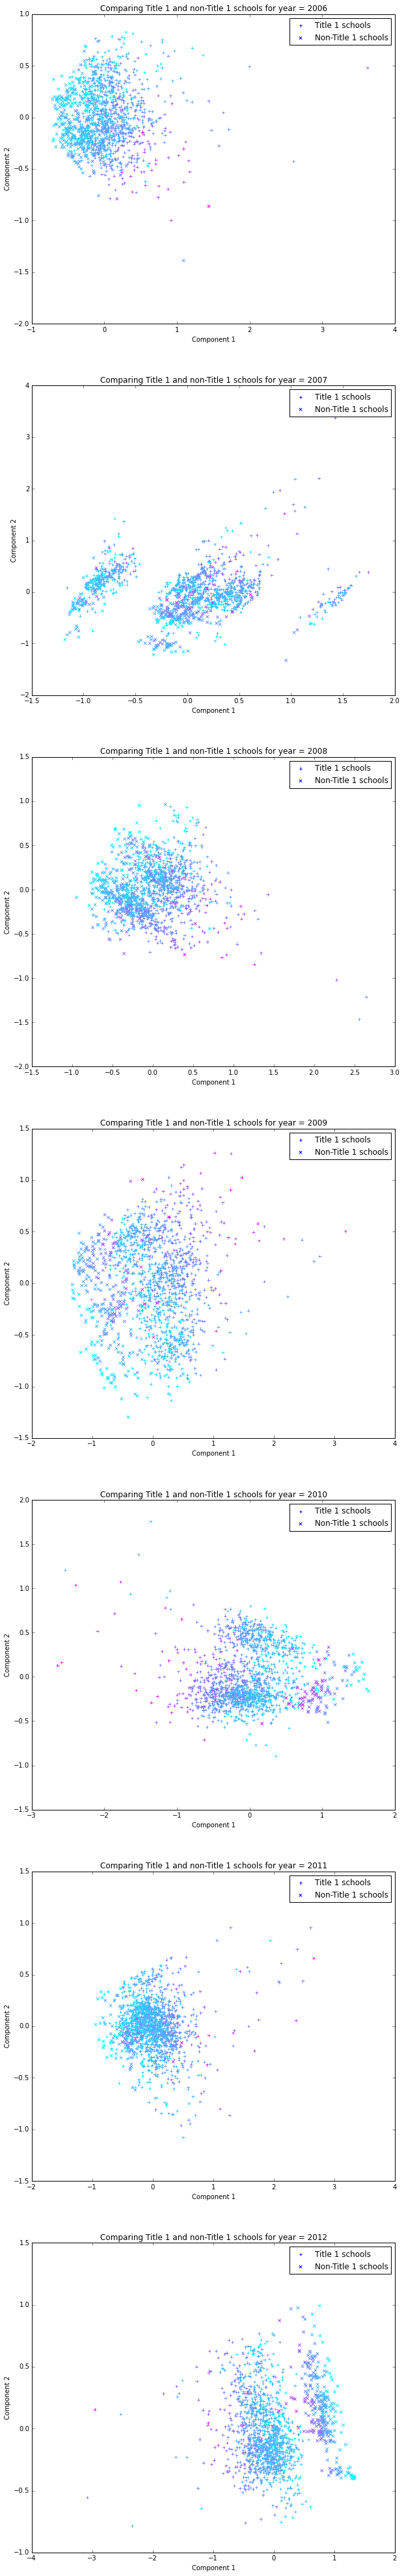

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
%matplotlib inline

fig = plt.figure(figsize=(10,70))
for year in all_years_data:
    ## Note we want to explore only the expenditures.
    X = all_years_data[year].drop(np.append(list(set(demo_and_account.columns)-set(['DBN'])), ['Title_1', 'District','School']), axis=1)
    
    ##Scale and center the data
    X = (X - X.mean())
    X = X / X.max()
    
    ##Use PCA to transform data
    pca = PCA()
    trans_x = pca.fit_transform(X)
    
    ##Make plots
    ax = plt.subplot(7,1,year-2005)
    
    mask = (all_years_data[year]['Title_1'] == 1)
    
    ax.scatter(trans_x[mask.values,0],trans_x[mask.values,1], marker='+', c=all_years_data[year][mask.values].sped_percent, cmap='cool', label='Title 1 schools')
    ax.scatter(trans_x[~mask.values,0],trans_x[~mask.values,1], marker='x', c=all_years_data[year][~mask.values].sped_percent, cmap='cool', label='Non-Title 1 schools')
    
    Title = 'Comparing Title 1 and non-Title 1 schools for year = ' + str(year)
    ax.legend(scatterpoints=1)
    ax.set_title(Title)
    ax.set_ylabel('Component 2')
    ax.set_xlabel('Component 1')